### 12 A simple CNN Make a train and validation dataset of images with vertical and horizontal images Defining the CNN to predict the knowledge from image classification Visualizing the learned CNN Model

#### https://www.kaggle.com/datasets/tahavahedi/verticalhorizontal

Found 6220 images belonging to 2 classes.
Found 1554 images belonging to 2 classes.
Epoch 1/10
195/195 [==============================] - 299s 2s/step - loss: 0.2395 - accuracy: 0.8936 - val_loss: 0.1606 - val_accuracy: 0.9260
Epoch 2/10
195/195 [==============================] - 39s 196ms/step - loss: 0.1735 - accuracy: 0.9278 - val_loss: 0.1512 - val_accuracy: 0.9382
Epoch 3/10
195/195 [==============================] - 56s 287ms/step - loss: 0.1621 - accuracy: 0.9352 - val_loss: 0.1966 - val_accuracy: 0.9170
Epoch 4/10
195/195 [==============================] - 61s 311ms/step - loss: 0.1399 - accuracy: 0.9441 - val_loss: 0.1136 - val_accuracy: 0.9569
Epoch 5/10
195/195 [==============================] - 33s 166ms/step - loss: 0.1243 - accuracy: 0.9516 - val_loss: 0.1206 - val_accuracy: 0.9485
Epoch 6/10
195/195 [==============================] - 35s 178ms/step - loss: 0.1040 - accuracy: 0.9619 - val_loss: 0.1117 - val_accuracy: 0.9582
Epoch 7/10
195/195 [============================

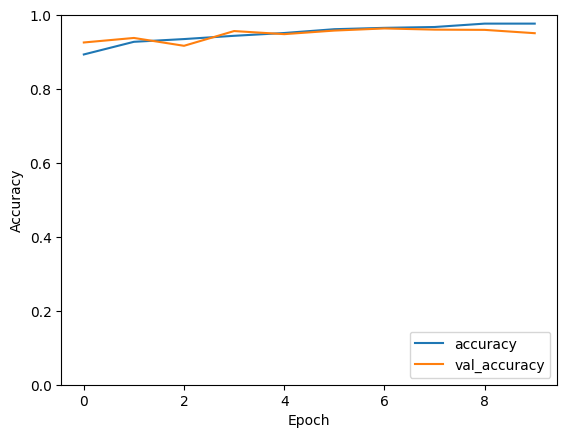

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define paths to your dataset directories
train_data_dir = "dataset/train"
test_data_dir = "dataset/test"

# Set image dimensions and batch size
image_size = (64, 64)
batch_size = 32

# Create data generators for training and validation
train_data_gen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
train_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Use binary classification for two classes
    subset='training'
)

val_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Define your CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Visualize the model's training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Visualize the learned model
model.summary()

In [2]:
from tensorflow.keras.models import load_model

model.save('my_model.h5')
model_path = 'my_model.h5'

C:\Users\nihal\AppData\Local\Programs\Python\Python311\myenv\env\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def predict_single_image(model_path, image_path):
    # Load the trained model
    model = load_model(model_path)

    # Define class labels
    class_labels = ["horizontal", "vertical"]

    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (64, 64))  # Resize to match the model's input size
    image = np.expand_dims(image, axis=0)  # Add a batch dimension

    # Normalize the image
    image = image / 255.0

    # Make a prediction
    prediction = model.predict(image)
    class_index = int(round(prediction[0][0]) ) # Convert the prediction to a class index (0 or 1)
    predicted_class = class_labels[class_index]

    return predicted_class

1/1 [==============================] - 0s 463ms/step
Image Predicted Class: vertical


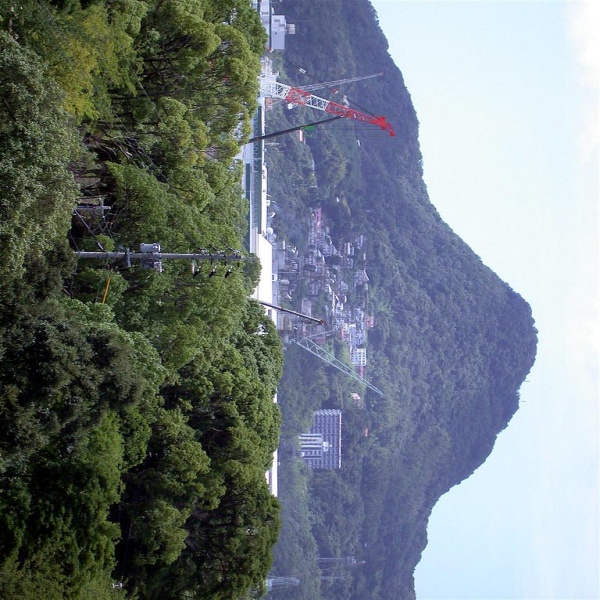

In [22]:
image_path_1 = '10.jpg' 

result = predict_single_image(model_path, image_path)
print(f"Image Predicted Class: {result}")

from IPython.display import Image
Image(filename='10.jpg')

1/1 [==============================] - 0s 417ms/step
Image Predicted Class: vertical


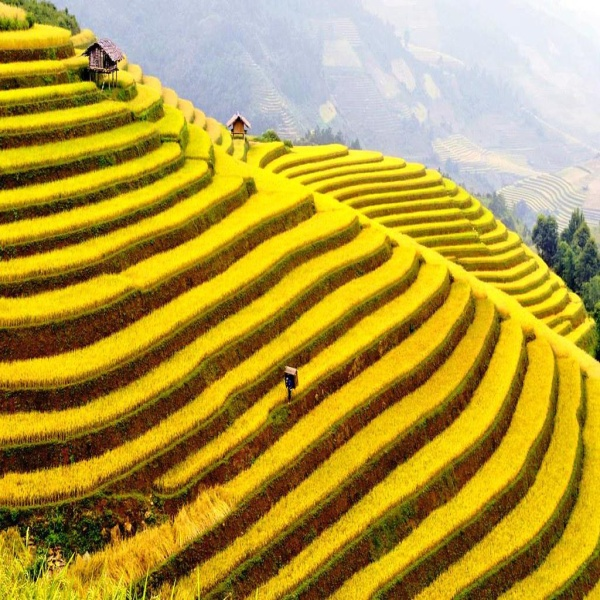

In [23]:
image_path_1 = '101.jpg' 

result = predict_single_image(model_path, image_path)
print(f"Image Predicted Class: {result}")

from IPython.display import Image
Image(filename='101.jpg')